## Final Project Submission

Please fill out:
* Student name: Joan Nyamache
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:N/A



Phase 1 Project:

Microsoft Movie Studio


Introduction

1. Overview 

The project aims to provide data-driven insights to support Microsoft's new movie studio in establishing a successful presence in the movie industry. The goal is to help Microsoft's new movie studio understand what kinds of movies are currently popular at the box office. We'll look at things like the types of movies people are watching the most, who is watching them, and how much money they're making. By doing this research, we aim to give the studio useful information that they can use to decide what kind of movies to make. This means figuring out which genres and themes are likely to attract the most viewers and make the most money. Ultimately, our objective is to give Microsoft's movie studio the insights they need to create successful movies that people will enjoy watching."

2. Project Goals

Project goals include the following: -
.	To investigate the current movie trends, in accordance to the Box Office Productions
.	To examine the necessary statistics that will be used to determine the movies that are succeeding at the Box Office.
.	To translate the findings into actionable insights that will be used by Microsoft Studio to make informed decisions to produce good movies.
.	To provide recommendations on the types of films that are likely to be successful in the future.

3. Business Understanding

This project's goal and objective is to investigate the kinds of movies that are currently doing well at the Box Office and offer useful information that Microsoft can use to decide what kinds of movies to make. In order to determine the most popular genres, actors, directors, and other elements that influence a film's industry success, the project will involve evaluating movie data.

4. Data Sources

The datasets are stored in the 'zippedData' folder and were sourced from:

Box Office MojoLinks
bom.movie_gross.csv

IMDBLinks
im.db

Rotten TomatoesLinks
rt.movie_info.tsv

TheMovieDBLinks
tmdb.movies.csv

The Numbers
tn.movie_budget.csv



Importing the relevant libraries

In [87]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Data from Datasets

In [88]:

#tmovies_budget=pd.read_csv(r"zippedData\tmdb.movies.csv\tmdb.movies.csv")

#tnmovies_budget=pd.read_csv(r"zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")

#trmovie_info=pd.read_csv(r"zippedData\rt.movie_info.tsv\rt.movie_info.tsv", sep='\t')

#rtreview_tsv=pd.read_csv(r"zippedData\rt.reviews.tsv\rt.reviews.tsv", sep='\t', encoding='latin1')

#bom_movies=pd.read_csv(r"zippedData\bom.movie_gross.csv\bom.movie_gross.csv")
#conn = sqlite3.connect('zippedData/im.db')

Box Office Movies

In [89]:
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [90]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The Movie Database (TMDB)

In [91]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [92]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Rotten Tomatoes Movie Information

In [115]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [116]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The Numbers Movie Budget

In [95]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Rotten Tomatoes Movie Information

In [133]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [134]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Rotten Tomatoes Reviews

In [136]:
rt_movie_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', encoding='unicode_escape', sep='\t')

rt_movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [137]:
rt_movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


IMDB dataset -IMDB

In [98]:
imdb = sqlite3.connect("zippedData/im.db" )
imdb

In [99]:
conn = sqlite3.connect('zippedData//im.db')
cur=conn.cursor()

In [100]:

imdb_tables = pd.read_sql("""
SELECT * 
    FROM movie_basics
    JOIN movie_ratings
    USING (movie_id);
""", conn)
imdb_tables

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [102]:
movie_basics = pd.read_sql("""select * from movie_basics""", conn)

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [103]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [104]:
movie_ratings = pd.read_sql("""select * from movie_ratings""", conn)

movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [105]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Data Cleaning

Here, we will select the data that we require from these sources to complete our objectives. We will then remove unwanted data which could be in the form of:

.Null values
.Duplicates
.Outliers

IMDB Data Cleaning

In [106]:

movie_basics.drop(columns=['original_title', 'runtime_minutes'], inplace=True)

movie_basics.dropna(subset=['genres'], inplace=True)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   movie_id       140736 non-null  object
 1   primary_title  140736 non-null  object
 2   start_year     140736 non-null  int64 
 3   genres         140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.4+ MB


In [107]:
movie_basics.head()

,movie_id,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


Box Office Movies Data Cleaning

 Converting the foreign_gross column to float

In [108]:
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(r'\D', '').astype(float)
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Lets create a column called 'revenue' in Box Office Movies that sums domestic & foreign gross.

In [109]:
bom_movies['revenue'] = bom_movies['domestic_gross'] + bom_movies['foreign_gross']
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year,revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


TMDB Data Cleaning

Here we will
Drop columns that we will not be using for analysis.
 Convert the release_date column to datetime.
 Drop duplicates.
 Sort values in descending order according to popularity.


In [110]:
tmdb_movies.drop(columns=['original_title', 'genre_ids', 'id'], inplace=True)
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_movies.sort_values('popularity', ascending=False, inplace=True)
tmdb_movies.drop_duplicates(subset = ['title'], inplace=True)
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24688 entries, 23811 to 26516
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         24688 non-null  int64         
 1   original_language  24688 non-null  object        
 2   popularity         24688 non-null  float64       
 3   release_date       24688 non-null  datetime64[ns]
 4   title              24688 non-null  object        
 5   vote_average       24688 non-null  float64       
 6   vote_count         24688 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.5+ MB


RT Movie Data Cleaning

Here we will

.Drop unwanted columns from rt_movie_reviews

.Drop rows with null values from review and rating columns

.Inspect rt_movie_reviews

In [138]:
rt_movie_reviews.drop(columns=['fresh', 'critic', 'top_critic', 'publisher', 'date'], inplace=True)
rt_movie_reviews.dropna(subset=['review', 'rating'], inplace=True)
rt_movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 54424
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35379 non-null  int64 
 1   review  35379 non-null  object
 2   rating  35379 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [139]:
rt_movie_reviews.head()

,id,review,rating
0,3,A distinctly gallows take on contemporary fina...,3/5
6,3,"Quickly grows repetitive and tiresome, meander...",C
7,3,Cronenberg is not a director to be daunted by ...,2/5
11,3,"While not one of Cronenberg's stronger films, ...",B-
12,3,Robert Pattinson works mighty hard to make Cos...,2/4



we will Drop rows with Null values in rating and genre

In [143]:

rt_movie_info.drop(columns=['director', 'writer', 'theater_date', 'dvd_date', 'runtime', 'box_office', 'synopsis', 'studio', 'currency'], inplace=True)
rt_movie_info.dropna(subset=['rating', 'genre'])
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1560 non-null   int64 
 1   rating  1557 non-null   object
 2   genre   1552 non-null   object
dtypes: int64(1), object(2)
memory usage: 36.7+ KB


In [144]:
rt_movie_info.head()

,id,rating,genre
0,1,R,Action and Adventure|Classics|Drama
1,3,R,Drama|Science Fiction and Fantasy
2,5,R,Drama|Musical and Performing Arts
3,6,R,Drama|Mystery and Suspense
4,7,NR,Drama|Romance


From the reviews dataframe it is possible to get valid data that can be used to draw conclusion on the ratings and the reviews

The Numbers Movie Budgets Data Cleaning

Converting to numerical data type (Float)

In [151]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')
movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


In [153]:
movie_budgets.shape

(5782, 6)

In [154]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB


 Converting the date which is an object to date time type.

In [155]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'], errors='coerce')
movie_budgets['year'] = movie_budgets['release_date'].dt.strftime('%Y')
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,2015


Lets add a column called  the international gross.This will help us find the movies budget

In [156]:
movie_budgets['international_gross'] = movie_budgets['worldwide_gross'] - movie_budgets['domestic_gross']
cols = list(movie_budgets.columns)

movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,international_gross
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009,2.015838e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011,8.046000e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019,1.070000e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,9.440081e+08
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017,6.965404e+08
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015,1.116649e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018,1.369319e+09
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,2007,6.540000e+08
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017,4.269209e+08
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,2015,6.795467e+08


In [157]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5782 non-null   int64         
 1   release_date         5782 non-null   datetime64[ns]
 2   movie                5782 non-null   object        
 3   production_budget    5782 non-null   float32       
 4   domestic_gross       5782 non-null   float32       
 5   worldwide_gross      5782 non-null   float64       
 6   year                 5782 non-null   object        
 7   international_gross  5782 non-null   float64       
dtypes: datetime64[ns](1), float32(2), float64(2), int64(1), object(2)
memory usage: 316.3+ KB


Merging the Datasets 

Joining of two datasets with a unique column

In [163]:
movie_budgets = movie_budgets.rename(columns={'movie': 'title'})
movie_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,international_gross
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009,2.015838e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011,8.046000e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019,1.070000e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,9.440081e+08
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017,6.965404e+08
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999,1.920130e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,0.000000e+00
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,0.000000e+00


In [170]:
merged_movies_budget = pd.merge(bom_movies,movie_budgets,on='title')
merged_movies_budget

,title,studio,domestic_gross_x,foreign_gross,year_x,revenue,id,release_date,production_budget,domestic_gross_y,worldwide_gross,year_y,international_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,47,2010-06-18,200000000.0,415004864.0,1.068880e+09,2010,653874658.0
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,38,2010-07-16,160000000.0,292576192.0,8.355246e+08,2010,542948450.0
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,27,2010-05-21,165000000.0,238736784.0,7.562447e+08,2010,517507889.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,53,2010-06-30,68000000.0,300531744.0,7.061028e+08,2010,405571084.0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,15,2010-05-07,170000000.0,312433344.0,6.211564e+08,2010,308723045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,NaN,64,2018-06-15,10000000.0,4286367.0,6.089100e+06,2018,1802733.0
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,NaN,95,2018-12-07,13000000.0,3703182.0,9.633111e+06,2018,5929929.0
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06,100,2018-02-02,30000000.0,490973.0,6.485990e+05,2018,157626.0
1245,Mandy,RLJ,1200000.0,NaN,2018,NaN,71,2018-09-14,6000000.0,1214525.0,1.427656e+06,2018,213131.0


In [171]:
merged_movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                1247 non-null   object        
 1   studio               1246 non-null   object        
 2   domestic_gross_x     1245 non-null   float64       
 3   foreign_gross        1086 non-null   float64       
 4   year_x               1247 non-null   int64         
 5   revenue              1084 non-null   float64       
 6   id                   1247 non-null   int64         
 7   release_date         1247 non-null   datetime64[ns]
 8   production_budget    1247 non-null   float32       
 9   domestic_gross_y     1247 non-null   float32       
 10  worldwide_gross      1247 non-null   float64       
 11  year_y               1247 non-null   object        
 12  international_gross  1247 non-null   float64       
dtypes: datetime64[ns](1), float32(2),

In [172]:
movies_profit = merged_movies_budget['worldwide_gross'] - merged_movies_budget['production_budget']

print(movies_profit)

0       868879522.0
1       675524642.0
2       591244673.0
3       638102828.0
4       451156389.0
           ...     
1242     -3910900.0
1243     -3366889.0
1244    -29351401.0
1245     -4572344.0
1246     -5544973.0
Length: 1247, dtype: float64


In [173]:
movies_profit.shape

(1247,)

In [177]:
movie_basics.set_index('movie_id', inplace=True)

movie_basics.head()

,primary_title,start_year,genres
movie_id,,,
tt0063540,Sunghursh,2013,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
tt0069049,The Other Side of the Wind,2018,Drama
tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [178]:
movie_ratings.set_index('movie_id', inplace=True)

movie_ratings.head()

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [179]:
imdb_joined = movie_basics.join(movie_ratings, how='outer')

imdb_joined.dropna(inplace=True)

imdb_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, tt0063540 to tt9916160
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  73052 non-null  object 
 1   start_year     73052 non-null  float64
 2   genres         73052 non-null  object 
 3   averagerating  73052 non-null  float64
 4   numvotes       73052 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.3+ MB


In [180]:
imdb_rating = imdb_joined[['genres','averagerating']]

# Group by genre and use the mean aggregate function

imdb_rating = imdb_rating.groupby('genres').mean()

# Sort values in descending order according to average rating

imdb_rating.sort_values('averagerating', ascending=False, inplace=True)

imdb_rating.drop_duplicates(inplace=True)

# Preview the first 10 values

imdb_rating.head()

,averagerating
genres,
"Comedy,Documentary,Fantasy",9.4
"Documentary,Family,Musical",9.3
"History,Sport",9.2
"Music,Mystery",9.0
"Drama,Fantasy,War",8.8


Data Visualization

We will create some graphs that will help us visualize the data we have gathered better.

Worldwide_gross vs Production Budget.

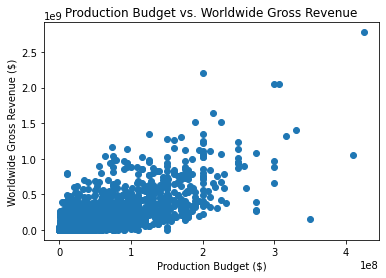

In [175]:
import matplotlib.pyplot as plt

# Create a scatter plot of production_budget vs. worldwide_gross
plt.scatter(movie_budgets['production_budget'], movie_budgets['worldwide_gross'])

# Set the x-axis and y-axis labels
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross Revenue ($)')

# Set the plot title
plt.title('Production Budget vs. Worldwide Gross Revenue')

# Show the plot
plt.show()

Bar graphs showing the highest rated and most popular movie genres

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

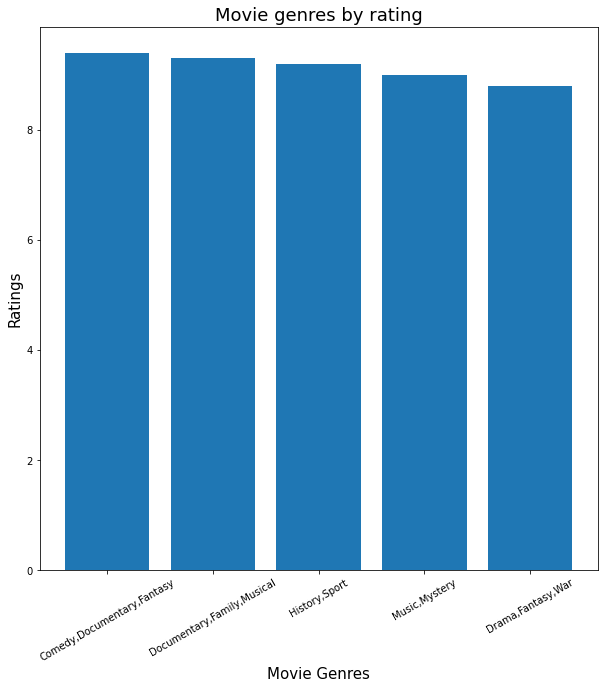

In [184]:
fig, ax = plt.subplots(figsize=(10,10))


highest_rated_genres = imdb_rating.index.to_list()[0:5]
highest_rated_genres_ratings = imdb_rating['averagerating'][0:5].to_list()


ax.bar(highest_rated_genres, highest_rated_genres_ratings)

ax.set_title("Movie genres by rating", fontsize = 18)
ax.set_ylabel("Ratings", fontsize = 15)
ax.set_xlabel("Movie Genres", fontsize = 15)
plt.xticks(rotation=30)

Movie genres by popularity

Text(0.5, 0, 'Movie Genres')

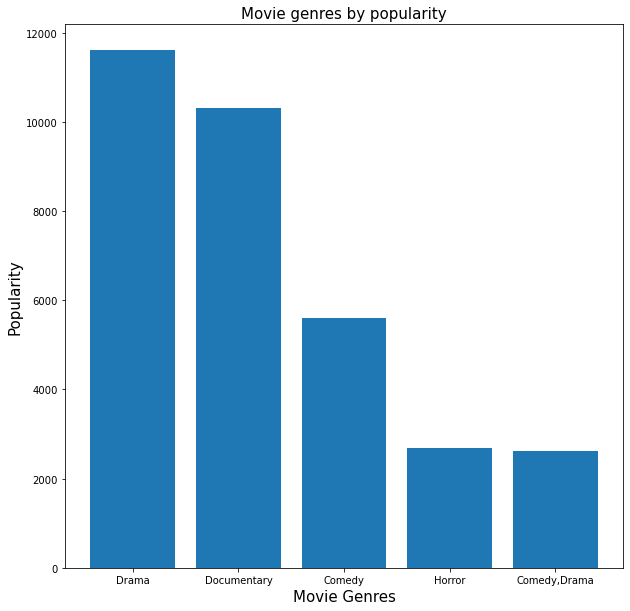

In [183]:
fig, ax = plt.subplots(figsize=(10,10))


popular_genres = imdb_joined['genres'].value_counts()[0:5].index.to_list()
popular_genres_freq = imdb_joined['genres'].value_counts()[0:5].to_list()


ax.bar(popular_genres, popular_genres_freq)

ax.set_title("Movie genres by popularity", fontsize = 15)
ax.set_ylabel("Popularity", fontsize = 15)
ax.set_xlabel("Movie Genres", fontsize = 15)

Plot a graph between domestic and wordwide gross

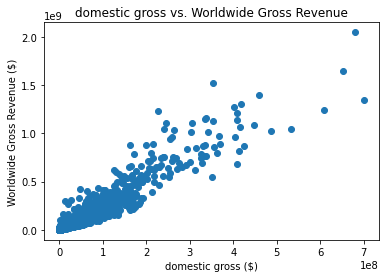

In [185]:
import matplotlib.pyplot as plt

# Create a scatter plot of domestic_gross_y vs. worldwide_gross
plt.scatter(merged_movies_budget['domestic_gross_y'], merged_movies_budget['worldwide_gross'])

# Set the x-axis and y-axis labels
plt.xlabel('domestic gross ($)')
plt.ylabel('Worldwide Gross Revenue ($)')

# Set the plot title
plt.title('domestic gross vs. Worldwide Gross Revenue')

# Show the plot
plt.show()

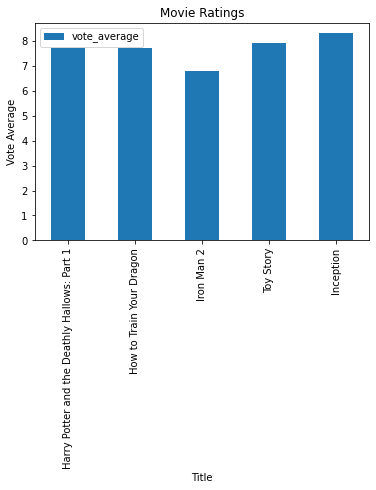

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame
data = {
    'title': ['Harry Potter and the Deathly Hallows: Part 1', 'How to Train Your Dragon', 'Iron Man 2', 'Toy Story', 'Inception'],
    'vote_average': [7.7, 7.7, 6.8, 7.9, 8.3]
}
df = pd.DataFrame(data)

# Create a bar plot
df.plot(kind='bar', x='title', y='vote_average')

# Set the plot title and axis labels
plt.title('Movie Ratings')
plt.xlabel('Title')
plt.ylabel('Vote Average')

# Show the plot
plt.show()


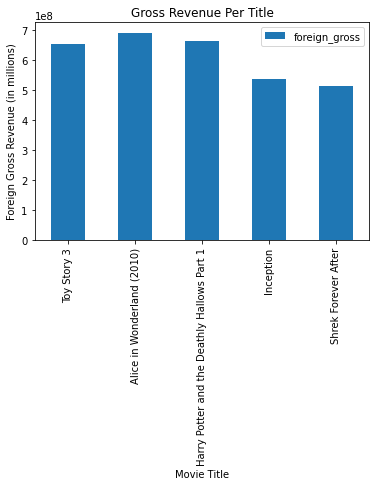

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame
data = {
    'title': ['Toy Story 3', 'Alice in Wonderland (2010)', 'Harry Potter and the Deathly Hallows Part 1', 'Inception', 'Shrek Forever After'],
    'foreign_gross': [652000000, 691300000, 664300000, 535700000, 513900000]
}
df = pd.DataFrame(data)

# Create a bar plot
df.plot(kind='bar', x='title', y='foreign_gross')

# Set the plot title and axis labels
plt.title('Gross Revenue Per Title')
plt.xlabel('Movie Title')
plt.ylabel('Foreign Gross Revenue (in millions)')

# Show the plot
plt.show()

From above workings, it clearly shows that there is no direct relationship between the movie with the highest viewing on average and the gross income.

Text(0.5, 0, 'Movie Genres')

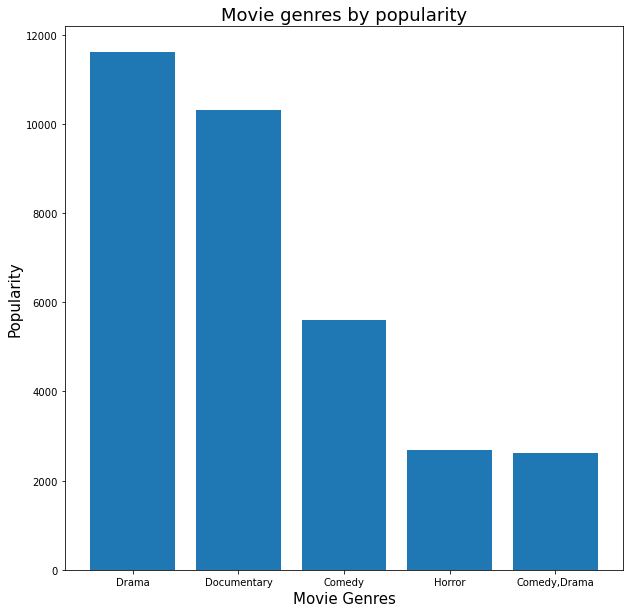

In [190]:
fig, ax = plt.subplots(figsize=(10,10))
popular_genres = imdb_joined['genres'].value_counts()[0:5].index.to_list()
popular_genres_freq = imdb_joined['genres'].value_counts()[0:5].to_list()


ax.bar(popular_genres, popular_genres_freq)

ax.set_title("Movie genres by popularity", fontsize = 18)
ax.set_ylabel("Popularity", fontsize = 15)
ax.set_xlabel("Movie Genres", fontsize = 15)

Relationship between movie production budget and revenue.

Text(0.5, 0, 'Revenue ( x $ 1,000,000)')

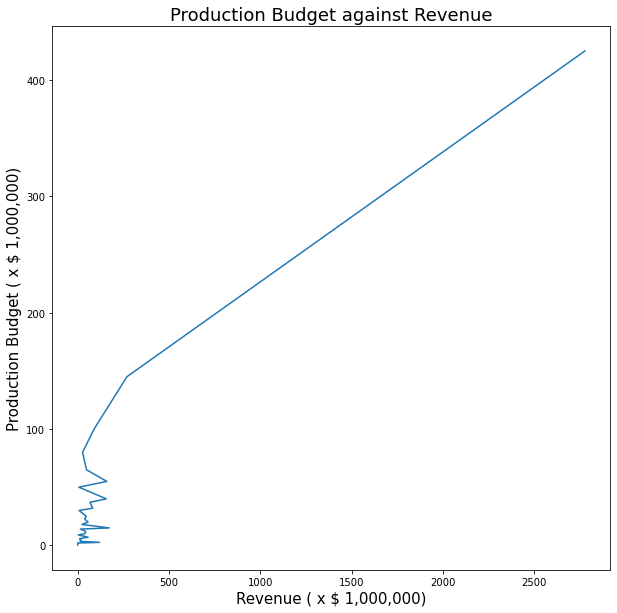

In [191]:
ig, ax = plt.subplots(figsize=(10,10))

budget = movie_budgets['production_budget'].iloc[::200]/1000000
revenue = movie_budgets['worldwide_gross'].iloc[::200]/1000000
ax.plot(revenue,budget)

ax.set_title("Production Budget against Revenue", fontsize = 18)
ax.set_ylabel("Production Budget ( x $ 1,000,000)", fontsize = 15)
ax.set_xlabel("Revenue ( x $ 1,000,000)", fontsize = 15)

Movie Studios by Revenue

In [194]:
bom_studio_revenue = bom_movies[['studio','revenue']]


bom_studio_revenue = bom_studio_revenue.groupby('studio').mean()

bom_studio_revenue.sort_values('revenue', ascending=False, inplace=True)

bom_studio_revenue.drop_duplicates(inplace=True)

bom_studio_revenue.head(10)

,revenue
studio,
HC,8.703000e+08
P/DW,5.076500e+08
BV,4.249078e+08
GrtIndia,2.542000e+08
WB,2.368577e+08
WB (NL),2.344114e+08
Fox,2.311968e+08
Sony,2.133782e+08
Par.,2.068532e+08


Text(0.5, 0, 'Movie Studios')

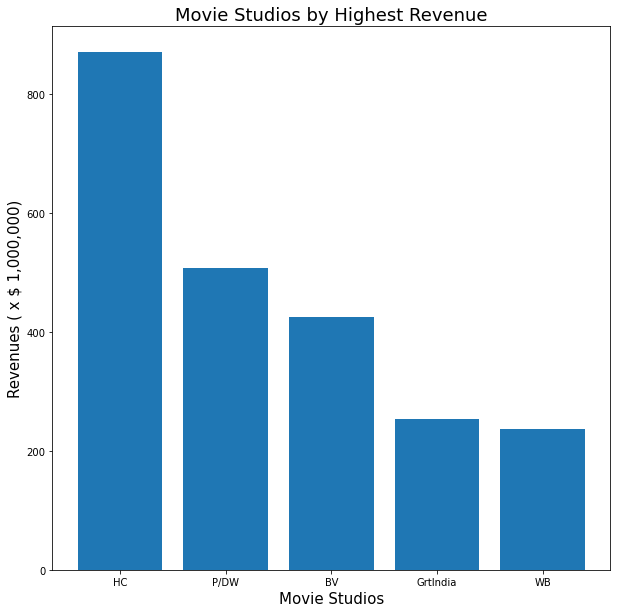

In [195]:
fig, ax = plt.subplots(figsize=(10,10))

# Get values for x and y axis for the plot

movie_studios = bom_studio_revenue.index.to_list()[0:5]
studio_revenues = (bom_studio_revenue['revenue'][0:5]/1000000).to_list()


# Set the x and y axis

ax.bar(movie_studios, studio_revenues)

# Set plot charateristics

ax.set_title("Movie Studios by Highest Revenue", fontsize = 18)
ax.set_ylabel("Revenues ( x $ 1,000,000)", fontsize = 15)
ax.set_xlabel("Movie Studios", fontsize = 15)